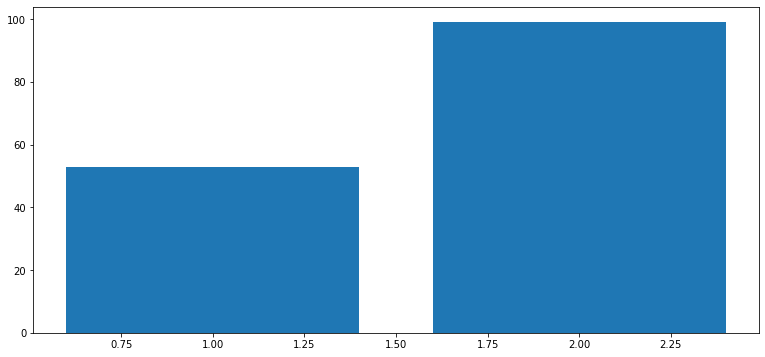

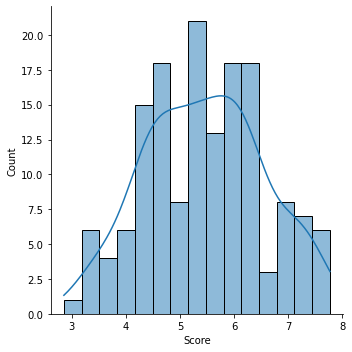

среднее квадратичное отклонение для квантили до 0.25 -  0.6042591033748519
среднее квадратичное отклонение для квантили от 0.25 до 0.5 -  0.8451218248110328
среднее квадратичное отклонение для квантили от 0.5 до 0.75 -  0.67014958999687
среднее квадратичное отклонение для квантили от 0.75 до 1.0 -  0.6093631659317046


<AxesSubplot:title={'center':'Correlation between Global Sales and User Score'}, xlabel='GDP per capita', ylabel='Social support'>

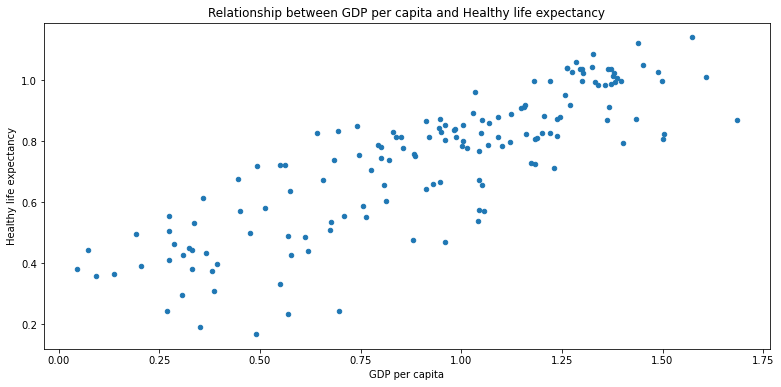

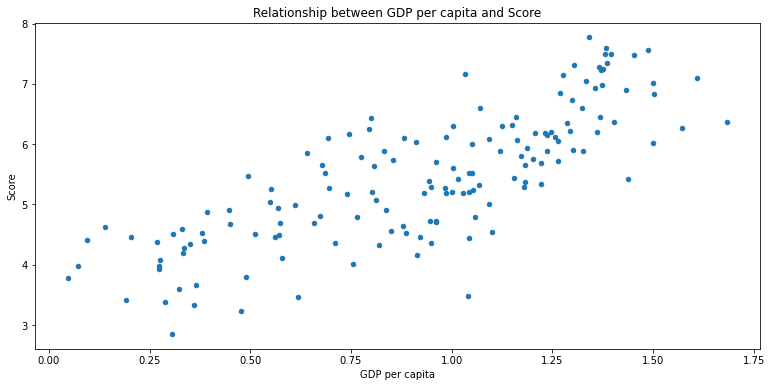

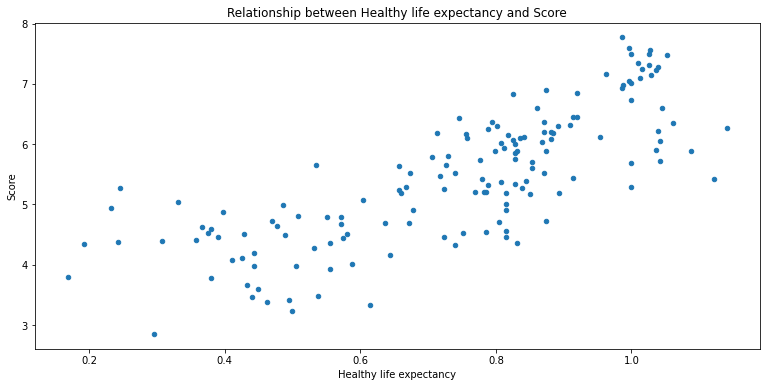

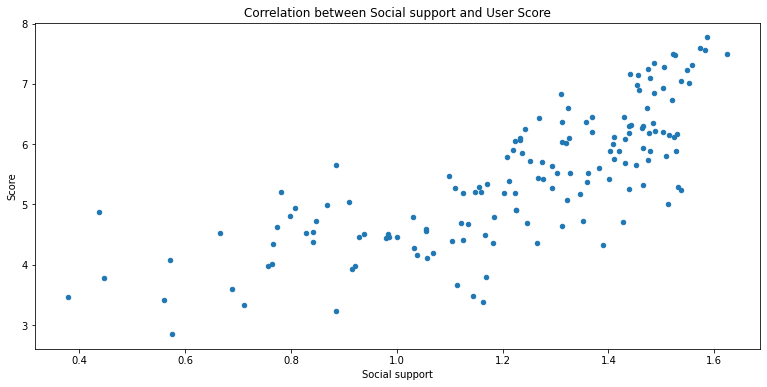

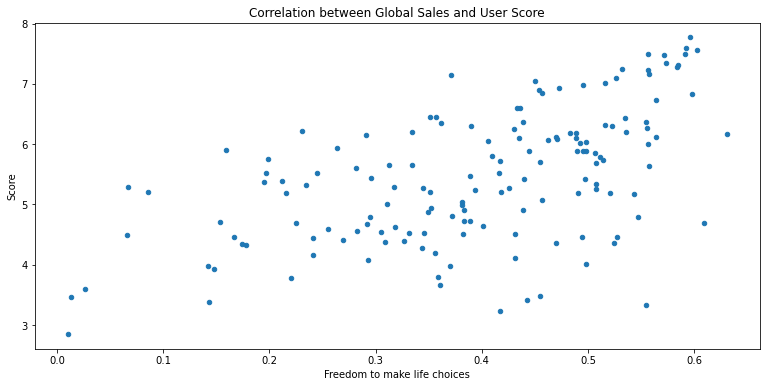

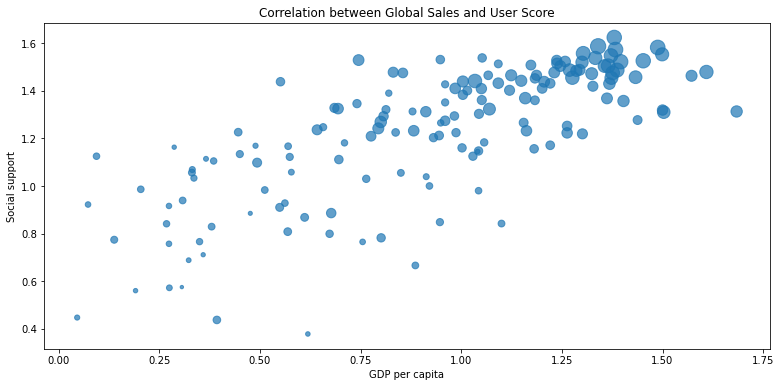

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

df = pd.read_csv('2019.csv')

# уберем строки с нулевыми значениями 
df = df[(df["Healthy life expectancy"] != 0) & (df["GDP per capita"] != 0) & (df["Social support"] != 0) & (df["Social support"] != 0) & (df["Freedom to make life choices"] != 0)]

# Представим за среднее значение уровня счастья не среднее арифметическое значение, а разницу между максимальным 
# и минимальным значением 
average = df["Score"].max() - df["Score"].min()

# Столбчатая диаграмма для сравнения количества стран ниже среднего значения уровня жизни с количеством стран выше среднего
# Из диаграммы видно что стран с счастливыми людьми больше чем стран с неcчастливыми.
plt.bar([1,2],[df["Score"][df["Score"]<average].count(), df["Score"][df["Score"]>average].count()])

plt.show()

# Построим гистограму распределения уровня счастья, из кототрой видно, что он иммет нормальный закон распределения. 
ax = sns.displot(df.Score,
                 kde=True,
                 bins=15)
plt.show()

# зависимость между ВВП на душу населения и продолжительностью жизни
# из графика видно что при увеличении ВВП на душу населения в странах растет продолжительность жизни
df.plot(kind='scatter', 
        x="GDP per capita", 
        y="Healthy life expectancy", 
        title='Relationship between GDP per capita and Healthy life expectancy')

# зависимость между ВВП на душу населения и счастьем
# из графика видно что при увеличении ВВП на душу населения в странах растет уровень счастья
df.plot(kind='scatter', 
        x="GDP per capita", 
        y="Score", 
        title='Relationship between GDP per capita and Score')


# найдем среднее квадратичное отклонение в зависимости от квантиль ВВП
# из полученных результатов видим что среднее квадратичное отклонение минмально для стран с большим и с маленьким уровнем ВВП
# и максимально для стран со средним ВВП на душу населения, из чего можно сделать вывод что уровень ВВП от 0.25 до 0.75 квантилей
# меньше влияет на уровень счастья 
sqt_GDP_025 = df["Score"][df["GDP per capita"] < df["GDP per capita"].quantile(0.25)].std()  
sqt_GDP_025_05 = df["Score"][(df["GDP per capita"].quantile(0.25) < df["GDP per capita"]) & (df["GDP per capita"].quantile(0.5) < df["GDP per capita"])].std()  
sqt_GDP_05_075 = df["Score"][(df["GDP per capita"].quantile(0.5) < df["GDP per capita"]) & (df["GDP per capita"].quantile(0.75) > df["GDP per capita"])].std()
sqt_GDP_075_1 = df["Score"][df["GDP per capita"] > df["GDP per capita"].quantile(0.75)].std()


print("среднее квадратичное отклонение для квантили до 0.25 - ", sqt_GDP_025)
print("среднее квадратичное отклонение для квантили от 0.25 до 0.5 - ", sqt_GDP_025_05)
print("среднее квадратичное отклонение для квантили от 0.5 до 0.75 - ", sqt_GDP_05_075)
print("среднее квадратичное отклонение для квантили от 0.75 до 1.0 - ", sqt_GDP_075_1)



# зависимость между счастьем и продолжительностью жизни
# из графика видно что при увеличении продолжительности жизни в странах растет уровень счастья
df.plot(kind='scatter', 
        x="Healthy life expectancy" ,
        y="Score", 
        title='Relationship between Healthy life expectancy and Score')

# зависимость между уровнем счастья и социальной поддержкой 
# из графика видно что при увеличении социальной поддержки в странах растет уровень счастья
df.plot(kind='scatter', 
        x="Social support", 
        y="Score", 
        title='Correlation between Social support and User Score')

# зависимость между уровнем счастья и свободой делать свой собственный выбор
# из графика видно что увеличении свободы делать свой собственный выбор почти не влияет на уровень счастья 
df.plot(kind='scatter', 
        x="Freedom to make life choices", 
        y="Score", 
        title='Correlation between Global Sales and User Score')

# из данного графика видно что при уровне ВВП на душу населения выше 1.25 страны имеют высокий уровень социальной поддержки,
# и один из самых высоких уровней счастья
# также видно что в пределах уровня ВВП от 0.6 до 1.25 есть страны как с высоким уровнем социальной поддержки 
# так и с низким уровнем, и чем выше уровень социальной поддержки при том же уровне ВВП тем счастливее люди,
# при уровне ВВП ниже 0.6 такой закономерности меньше  
df.plot(kind='scatter', 
        x='GDP per capita', 
        y='Social support', 
        s= df.Score**3/2,    
        title='Correlation between Global Sales and User Score',
        marker = 'o',
        alpha=0.7
       )





